<a href="https://colab.research.google.com/github/joeyipdellemc/nn/blob/master/giant_neural_network_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beginner Intro to Neural Networks 12: Neural Network in Python from Scratch 
https://youtu.be/LSr96IZQknc

In [0]:
%matplotlib inline

In [0]:
from matplotlib import pyplot as plt
import numpy as np

In [0]:
#each point is length , width, type
data = [[3,  1.5,  1],
        [2,   1,    0],
        [4,   1.5,  1],
        [3,   1,    0],
        [3.5, .5,   1],
        [2,   .5,   0],
        [5.5,  1,    1],
        [1,   1,    0]]
mystery_flower = [4.5, 1]

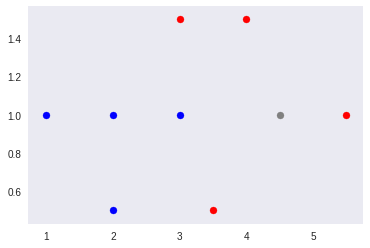

In [4]:
# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

In [0]:
#network
#   o    flower type
#  / \  w1,w2,b
# o   o  length, width

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# derivative sigmoid http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm
# https://www.youtube.com/watch?v=R7xu8Hhgu9U
def sigmoid_P(x):
    return sigmoid(x) * (1-sigmoid(x))

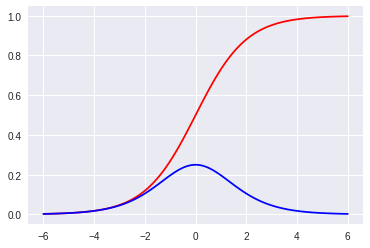

In [7]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_P(T), c='b')

In [0]:
#Training Loop

def train():
    #pre train
    w1=np.random.randn()
    w2=np.random.randn()
    b=np.random.randn()
    iterations = 10000
    learning_rate = 0.1
    costs=[] # keep costs during training, see if they go down
    for i in range(50000):
        ri = np.random.randint(len(data))# get a random point
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
    
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i%100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
           
    
        dcost_pred = 2 *(pred-target)
        dpred_dz = sigmoid_P(z)

        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1

        dcost_cost = dcost_pred * dpred_dz

        dcost_dw1 = dcost_cost * dz_dw1
        dcost_dw2 = dcost_cost * dz_dw2
        dcost_db = dcost_cost * dz_db

        w1 = w1 - dcost_dw1 * learning_rate
        w2 = w2 - dcost_dw2 * learning_rate
        b = b - dcost_db * learning_rate
    
    return costs,w1,w2,b


In [0]:
costs,w1,w2,b = train()

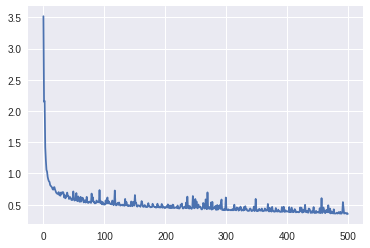

In [10]:
fig = plt.plot(costs)

In [11]:
#predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9992679911810874
close to 0 -> blue, close to 1 -> red


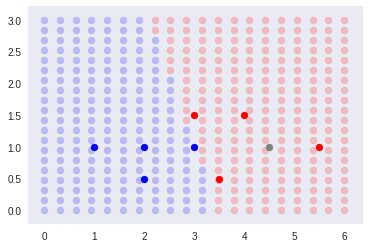

In [13]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()